## Tugas

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
   - Jumlah cluster yang terbentuk.
   - Banyaknya noise.
   - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [15]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan

In [16]:
# Load dataset
df = pd.read_csv(r'C:\Users\USER\Downloads\Iris.csv')

In [17]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [18]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[features].values

In [19]:
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Reduksi dimensi PCA (2D untuk visualisasi)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [21]:
# Clustering dengan HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X_scaled)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [22]:
# Informasi cluster
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)
print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster terbentuk: 2
Jumlah noise: 2


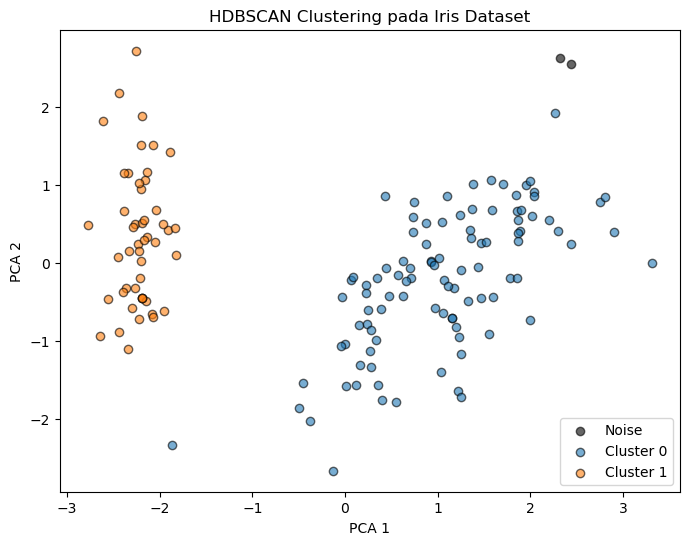

In [23]:
# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
palette = np.array(plt.cm.tab10.colors)
for i, label in enumerate(np.unique(cluster_labels)):
    mask = cluster_labels == label
    color = 'k' if label == -1 else palette[label % 10]
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[color], label=label_name, alpha=0.6, edgecolors='k')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('HDBSCAN Clustering pada Iris Dataset')
plt.legend()
plt.show()

### Analisis

Dari 3 spesies Iris (Setosa, Versicolor, Virginica), HBDSCAN hanya membentuk 2 cluster dengan noise 2. Artinya, HBDSCAN menggabungkan beberapa spesies menjadi satu cluster karena pola distribusi fitur mereka tidak terlalu terpisah di ruang 4 dimensi. Cluster yang terbentuk sebagian sesuai dengan label asli, tetapi tidak semua spesies dipisahkan dengan sempurna.